<a href="https://colab.research.google.com/github/azadsalamgithub/Git_Abdus/blob/main/Predict-the-percentage-of-an-student-based-on-the-no.-of-study-hours_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


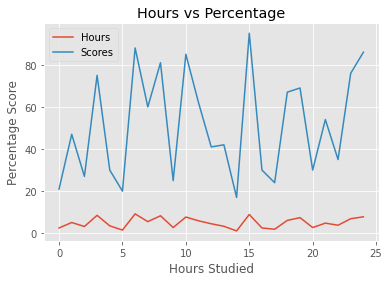

In [34]:
#Data Visualization

plt.style.use('ggplot')
data.plot(kind="line")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

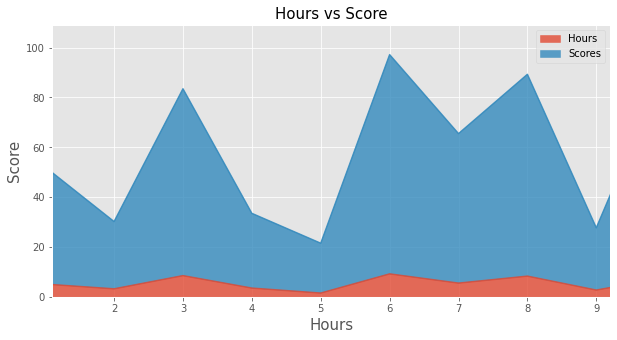

In [35]:
#visualization with area plot

xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area', alpha=0.8, stacked=True, figsize=(10,5), xlim=(xmin,xmax))
plt.title('Hours vs Score', size=15)
plt.xlabel('Hours', size=15)
plt.ylabel('Score', size=15)
plt.show()

In [7]:
x=data["Hours"].values.reshape(-1,1)

In [8]:
y=data["Scores"].values.reshape(-1,1)

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
x_train

array([[7.7],
       [6.1],
       [7.4],
       [3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [13]:
regressor = LinearRegression() 

In [14]:
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#To retrieve the intercept:
print(regressor.intercept_)

[-1.53695733]


In [16]:
#For retrieving the slope:
print(regressor.coef_)

[[10.46110829]]


In [17]:
y_pred = regressor.predict(x_test)

In [18]:
y_pred

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [19]:
y_test

array([[17],
       [42],
       [24],
       [75],
       [54]])

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [21]:
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [22]:
import matplotlib.pyplot as plt 

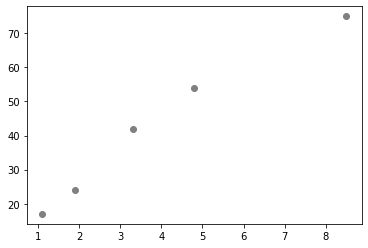

In [23]:
plt.scatter(x_test, y_test,  color='gray')

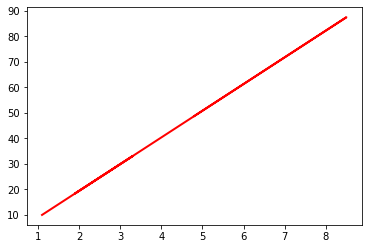

In [24]:
plt.plot(x_test, y_pred, color='red', linewidth=2)

In [25]:
plt.show()

In [26]:
from sklearn import metrics

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432


In [28]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 68.88092074277635


In [29]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 8.299453038771674


In [30]:
df.head()

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362
